In [75]:
import quandl
import pandas as pd

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.964351,0.130884,1990515.0
2018-03-22,1053.150000,3.254997,-2.487014,3418154.0
2018-03-23,1026.550000,4.082607,-2.360729,2413517.0


In [76]:
import numpy as np
import math
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression

In [77]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [78]:
df['label'] = df[forecast_col].shift(-forecast_out)
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1.964351,0.130884,1990515.0,NaN
2018-03-22,1053.150000,3.254997,-2.487014,3418154.0,NaN
2018-03-23,1026.550000,4.082607,-2.360729,2413517.0,NaN


In [79]:
df.dropna(inplace=True)
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,1.139829,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,1.202822,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,1.530988,0.476195,2774967.0,1026.550000


In [80]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
y = np.array(df['label'])

In [81]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [82]:
# clf = svm.SVR()
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# confidence


In [83]:
clf = LinearRegression(n_jobs=-1) #using all threads availaible
clf.fit(X_train, y_train)

import pickle
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
confidence = clf.score(X_test, y_test)
confidence

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [84]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9737498378119197
poly 0.6728558093212719
rbf 0.7842588484423412
sigmoid 0.8791034168313725


In [85]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence)

[827.20090977 837.80028978 836.48882492 828.01536561 824.82648346
 806.46235    782.04957949 812.08583939 808.6412147  814.46289085
 786.90914564 819.78190675 833.61828697 818.68236238 827.44697015
 817.22623701 823.49544346 814.0332465  813.95339363 838.84059737
 867.13532339 852.21602961 853.24022991 832.78300446 851.45223079
 841.22607832 863.37637954 849.93962216 878.42201993 855.08910361
 852.78862129 856.11158687 873.74111946 875.08963067 830.75709804] 0.8791034168313725


In [86]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
last_unix

1517788800.0

In [87]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
#     print (df.loc[next_date])

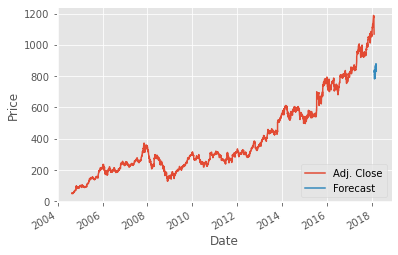

In [88]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()